In [88]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt	

# 下载数据集
cifar10 = tf.keras.datasets.cifar10	

(X_train,y_train),(X_test,y_test) = cifar10.load_data()


In [89]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


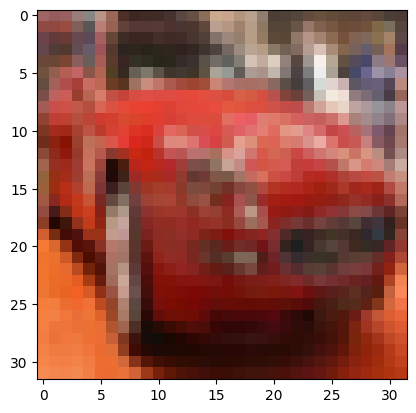

In [90]:
plt.imshow(X_train[5])

In [91]:
y_train[5]

array([1], dtype=uint8)

In [92]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [93]:
# 对图像images进行数字标准化
Xtrain_normalize = X_train.astype('float32') / 255.0
Xtest_normalize = X_test.astype('float32') / 255.0

In [94]:
# 对标签labels进行One-Hot Encoding
Ytrain_ohe = keras.utils.to_categorical(y_train)
Ytest_ohe = keras.utils.to_categorical(y_test)


In [95]:
# 建立Sequential线性堆叠模型
model = tf.keras.models.Sequential()

In [96]:
model.add(tf.keras.layers.Conv2D(filters = 32,
    	                         kernel_size = (3,3),
	                            input_shape = (32, 32, 3), 
	                            activation = 'relu', 
	                            padding = 'same'))

In [97]:
# 防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

In [98]:
# 第1个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [99]:
# 第2个卷积层
model.add(tf.keras.layers.Conv2D(filters = 64,
                                 kernel_size = (3,3),
                                 activation = 'relu', 
                                 padding = 'same'))

In [100]:
#防止过拟合
model.add(tf.keras.layers.Dropout(rate=0.3))

In [101]:
# 第2个池化层
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

In [102]:
# 平坦层
model.add(tf.keras.layers.Flatten())

In [103]:
# 添加输出层
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)             

In [105]:
# 设置训练参数
train_epochs = 15 # 训练轮数
batch_size = 100  # 单次训练样本数（批次大小）

In [106]:
model.compile(optimizer = 'adam', # 优化器
              loss = 'categorical_crossentropy', # 损失函数
              metrics = ['accuracy']) # 评估模型的方式

In [107]:
train_history = model.fit(Xtrain_normalize, Ytrain_ohe, 
            	          validation_split = 0.2,
            	          epochs = train_epochs,
            	          batch_size = batch_size,
            	          verbose = 2)

Epoch 1/15
400/400 - 33s - loss: 1.5918 - accuracy: 0.4308 - val_loss: 1.4370 - val_accuracy: 0.5534
Epoch 2/15
400/400 - 34s - loss: 1.2210 - accuracy: 0.5736 - val_loss: 1.2918 - val_accuracy: 0.5908
Epoch 3/15
400/400 - 31s - loss: 1.0922 - accuracy: 0.6208 - val_loss: 1.2140 - val_accuracy: 0.6244
Epoch 4/15
400/400 - 30s - loss: 1.0174 - accuracy: 0.6432 - val_loss: 1.1203 - val_accuracy: 0.6543
Epoch 5/15
400/400 - 30s - loss: 0.9561 - accuracy: 0.6686 - val_loss: 1.0986 - val_accuracy: 0.6496
Epoch 6/15
400/400 - 29s - loss: 0.9123 - accuracy: 0.6841 - val_loss: 1.0801 - val_accuracy: 0.6465
Epoch 7/15
400/400 - 29s - loss: 0.8714 - accuracy: 0.6999 - val_loss: 1.0668 - val_accuracy: 0.6382
Epoch 8/15
400/400 - 29s - loss: 0.8500 - accuracy: 0.7079 - val_loss: 1.0362 - val_accuracy: 0.6682
Epoch 9/15
400/400 - 29s - loss: 0.8174 - accuracy: 0.7165 - val_loss: 0.9711 - val_accuracy: 0.6917
Epoch 10/15
400/400 - 30s - loss: 0.7910 - accuracy: 0.7250 - val_loss: 0.9649 - val_accura

In [108]:
test_loss, test_acc = model.evaluate(Xtest_normalize, Ytest_ohe)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.9119 - accuracy: 0.7029
Test accuracy: 0.7028999924659729


In [113]:
predictions = model.predict(Xtest_normalize)
# 根据概率分布确定预测类别
pred_classes = np.argmax(predictions, axis=1)
pred_classes

array([3, 8, 0, ..., 5, 1, 7], dtype=int64)

In [114]:
def plot_images_labels_prediction(images,  #图像列表
                           labels,  #标签列表
                           prediction,  #预测值列表
                           index,  #从第index个开始显示
                           num = 5):  #默认一次显示5幅
    fig = plt.gcf()  #获取当前图表
    fig.set_size_inches(12,6)  #1英寸等于2.54cm
    if num>10:
        num = 10  #最多显示10个子图
        
    for i in range(0,num):
        ax = plt.subplot(2,5,i+1)  #获取当前要处理的子图
        ax.imshow(images[index])
        
        title = str(i)+','+label_dict[labels[index][0]]  #构建该图上要显示的title信息
    
        if len(prediction)>0:
            predicted_class = np.argmax(prediction[index])  # 转换为整数值
            title += '=>' +label_dict[predicted_class]
    
        ax.set_title(title,fontsize = 10)  #显示图上的title信息
        index+=1
    
    plt.show()

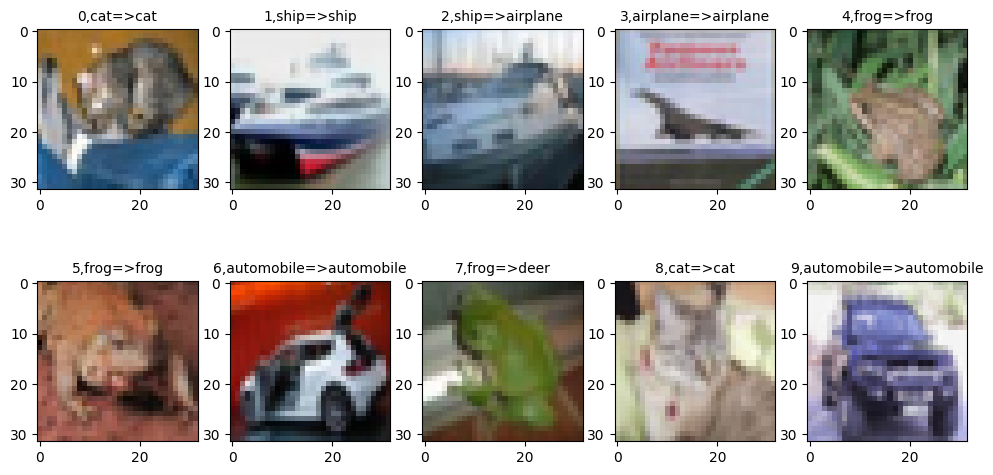

In [122]:
plot_images_labels_prediction(Xtest_normalize,
                              y_test,
                              predictions,0,10)